In [109]:
#Data science assignment-Delinquency Telecom Model
# Aravindh Gowtham B, Shiv Nadar University 

In [110]:
# I have created 6 deliquency models each based on: Logistic regression, KNN, SVM, Decision Tree, Random forest, Naive bayes
# and compiled all the results (AUC scores) to compare the performance of all the 6 models.
# For the comparison of results of all the 6 models scroll to the end.

In [57]:
import numpy as np
import pandas as pd

In [87]:
dataset = pd.read_csv(r"C:\Users\ARAVINDH GOWTHAM\Desktop\Pritvi.ai_assignment\sample_data_intw.csv")
dataset

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


In [88]:
dataset.describe()

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,209593.000000,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [89]:
dataset['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [8]:
#Dataset seems to be imbalanced.

In [90]:
y = dataset['label']
len(y)

209593

In [91]:
data = dataset.drop(columns=['label','msisdn','pcircle','pdate'])
data

,Unnamed: 0,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [66]:
feature_names = list(data.columns.values)

In [84]:
x = np.array(data)
(len(x),len(x[0]))

(209593, 33)

In [83]:
y = np.array(y)
y

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
x

array([[1.00000000e+00, 2.72000000e+02, 3.05505000e+03, ...,
        0.00000000e+00, 2.90000000e+01, 2.90000000e+01],
       [2.00000000e+00, 7.12000000e+02, 1.21220000e+04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.00000000e+00, 5.35000000e+02, 1.39800000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.09591000e+05, 1.01300000e+03, 1.18431117e+04, ...,
        0.00000000e+00, 4.00000000e+00, 3.83333333e+00],
       [2.09592000e+05, 1.73200000e+03, 1.24882283e+04, ...,
        0.00000000e+00, 0.00000000e+00, 1.05000000e+01],
       [2.09593000e+05, 1.58100000e+03, 4.48936200e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_1, X_test, y_1, y_test = train_test_split( x, y, test_size=0.25, random_state=42)

X_train,X_cv,y_train,y_cv = train_test_split(X_1,y_1,test_size = 0.25,random_state = 42)

In [105]:
#Over sampling technique SMOTE implementation
#sm = SMOTE(sampling_strategy=0.5,random_state=42)
#X_train, y_train = sm.fit_sample(X_train_1, y_train_1)


In [85]:
(len(X_train),len(X_test),len(X_cv),len(y_cv),len(y_train),len(y_test))

(117895, 52399, 39299, 39299, 117895, 52399)

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Logistic regression

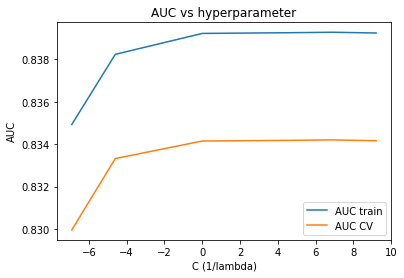

optimal lambda for which auc is maximum :  0


In [39]:
C = [10**-3, 10**-2, 10**0, 10**2,10**3,10**4]#C=1/lambda
auc_train=[]
auc_cv=[]
for c in C:
    lr=LogisticRegression(penalty='l1', C=c, solver='liblinear')#LogisticRegression(penalty='l1',C=c)
    lr.fit(X_train,y_train)
    probcv=lr.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=lr.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_c= C[auc_cv.index(max(auc_cv))]
C=[math.log(x) for x in C]#converting values of C into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(C, auc_train, label='AUC train')
ax.plot(C, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('C (1/lambda)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal lambda for which auc is maximum : ',1//optimal_c)

In [40]:
import sklearn.metrics as metrics


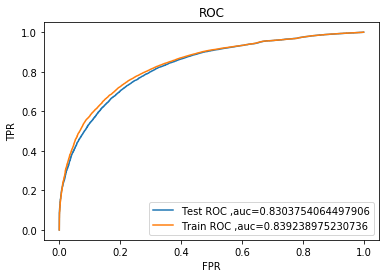

In [42]:
lr=LogisticRegression(C=optimal_c, penalty='l1', solver='liblinear')#LogisticRegression(penalty='l1',C=optimal_c)
lr.fit(X_train,y_train)
predi=lr.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=lr.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()


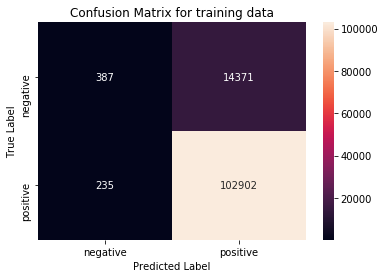

In [101]:
from sklearn.metrics import confusion_matrix
predic=lr.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_train, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for training data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [102]:
conf_mat

array([[   387,  14371],
       [   235, 102902]], dtype=int64)

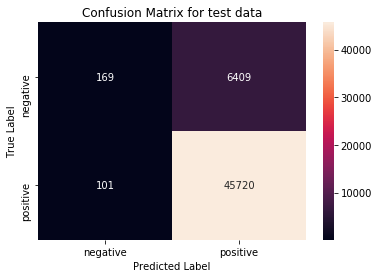

In [103]:

from sklearn.metrics import confusion_matrix
predic=lr.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



In [104]:
conf_mat

array([[  169,  6409],
       [  101, 45720]], dtype=int64)

In [46]:
weight=lr.coef_
pos_indx=np.argsort(weight)[:,::-1]

neg_indx=np.argsort(weight)

print('Top 10 positive features :')
for i in list(pos_indx[0][0:10]):
    print(feature_names[i])

Top 10 positive features :
medianamnt_loans30
medianamnt_loans90
cnt_ma_rech30
amnt_loans30
cnt_ma_rech90
amnt_loans90
fr_ma_rech90
payback30
daily_decr90
medianmarechprebal90


In [47]:
print('Top 10 negative features :')
for i in list(neg_indx[0][:10]):
    print(feature_names[i])

Top 10 negative features :
cnt_loans30
maxamnt_loans90
fr_da_rech90
cnt_da_rech90
payback90
daily_decr30
rental30
medianamnt_ma_rech90
sumamnt_ma_rech30
medianmarechprebal30


# Svm

In [70]:
import warnings
warnings.filterwarnings("ignore")

In [72]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection  import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

In [68]:
scalar = StandardScaler(with_mean=False)
X_train = scalar.fit_transform(X_train)
X_test= scalar.transform(X_test)
X_cv=scalar.transform(X_cv)

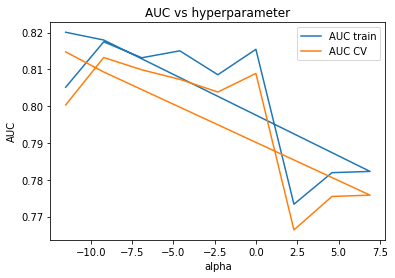

optimal alpha for which auc is maximum :  1e-05


In [165]:
alpha = [10**-5, 10**-4,10**-3,10**-2,10**-1,1,10,10**2,10**3,10**-4,10**-5]#alpha=1/C
auc_train=[]
auc_cv=[]
for a in alpha:
    model=SGDClassifier(alpha=a,max_iter=3000) #loss default hinge
    svm=CalibratedClassifierCV(model, cv=3) #calibrated classifier cv for calculation of predic_proba
    svm.fit(X_train,y_train)
    probcv=svm.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    probtr=svm.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))
optimal_alpha= alpha[auc_cv.index(max(auc_cv))]
alpha=[math.log(x) for x in alpha]#converting values of alpha into logarithm
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha, auc_train, label='AUC train')
ax.plot(alpha, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('alpha')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

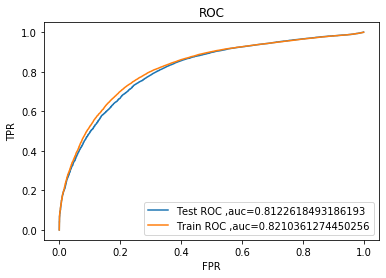

In [171]:

#training our model for alpha=0.00001
#ROC curve
model=SGDClassifier(alpha=0.00001)
svm=CalibratedClassifierCV(model, cv=3)
svm.fit(X_train,y_train)
predi=svm.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=svm.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

[[     0  14758]
 [     2 103135]]


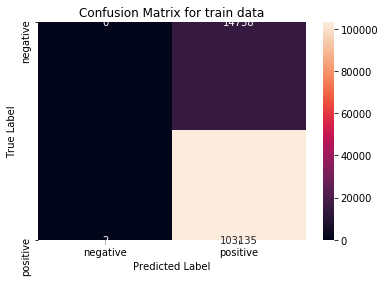

In [172]:
#confusion matrix for train data
#Confusion matrix using heatmap for train data
predic=svm.predict(X_train)
conf_mat = confusion_matrix(y_train, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

[[    0  6578]
 [    0 45821]]


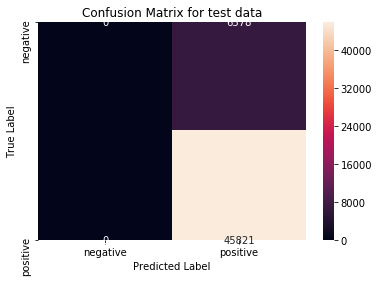

In [173]:
#confusion matrix for test data
#Confusion matrix using heatmap for test data
predic=svm.predict(X_test)
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
#training and crossvalidation to get optimal hyper parameters
depths=[1,5,10,50,100,500]
best_m=[]
min_samples=[2,5,10,15,100,500]
auc_train=[]
auc_cv=[]
for d in depths:
    ms,rc=0,0
    for m in min_samples:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        dt.fit(X_train,y_train)
        probc=dt.predict_proba(X_cv)[:,1]
        val=roc_auc_score(y_cv,probc)
        if val>rc:
            rc=val
            ms=m
    dt=DecisionTreeClassifier(max_depth=d,min_samples_split=ms)
    dt.fit(X_train,y_train)
    probcv=dt.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,probcv))
    best_m.append(ms)
    probtr=dt.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,probtr))

        
        
    
optimal_depth= depths[auc_cv.index(max(auc_cv))]
optimal_min_samples_split=best_m[auc_cv.index(max(auc_cv))]

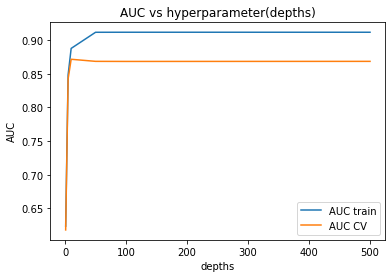

optimal depth for which auc is maximum :  10
optimal minimum samples split for which auc is maximum :  500


In [93]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(depths, auc_train, label='AUC train')
ax.plot(depths, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter(depths)')
plt.xlabel('depths')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal depth for which auc is maximum : ',optimal_depth)
print('optimal minimum samples split for which auc is maximum : ',optimal_min_samples_split)

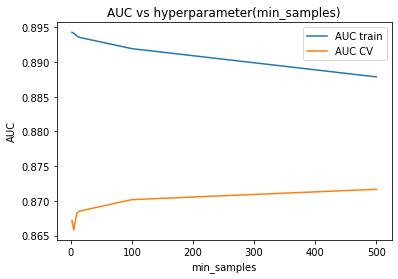

In [94]:
auc_train_m=[]
auc_cv_m=[]
for m in min_samples:
    dp,rc=0,0
    for d in depths:
        dt=DecisionTreeClassifier(max_depth=d,min_samples_split=m)
        dt.fit(X_train,y_train)
        probc=dt.predict_proba(X_cv)[:,1]
        val=roc_auc_score(y_cv,probc)
        if val>rc:
            rc=val
            dp=d
    dt=DecisionTreeClassifier(max_depth=dp,min_samples_split=m)
    dt.fit(X_train,y_train)
    probcv=dt.predict_proba(X_cv)[:,1]
    auc_cv_m.append(roc_auc_score(y_cv,probcv))
    best_m.append(ms)
    probtr=dt.predict_proba(X_train)[:,1]
    auc_train_m.append(roc_auc_score(y_train,probtr))

fig = plt.figure()
ax = plt.subplot(111)
ax.plot(min_samples, auc_train_m, label='AUC train')
ax.plot(min_samples, auc_cv_m, label='AUC CV')
plt.title('AUC vs hyperparameter(min_samples)')
plt.xlabel('min_samples')
plt.ylabel('AUC')
ax.legend()
plt.show()

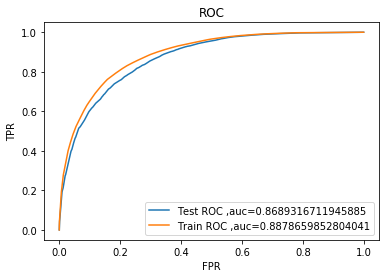

In [96]:
#training our model for max_depth=10,min_samples_split=500
#ROC curve
dt=DecisionTreeClassifier(max_depth=10,min_samples_split=500)
dt.fit(X_train,y_train)
predi=dt.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=dt.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

[[  6157   8601]
 [  1899 101238]]


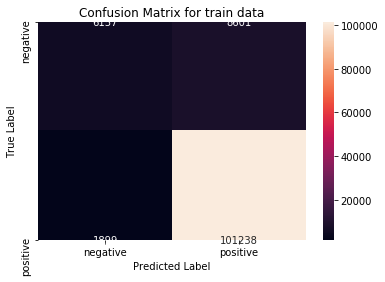

In [98]:
#confusion matrix for train data
#Confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix

predic=dt.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_train, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

[[ 2640  3938]
 [  886 44935]]


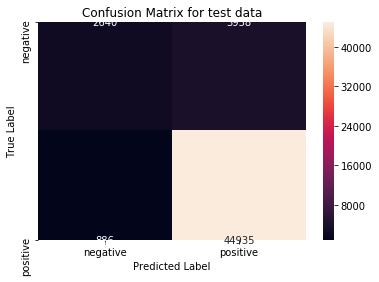

In [100]:
#confusion matrix for test data
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix

predic=dt.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

In [ ]:
#Top 10 features.
feat=dt.feature_importances_
all_features=np.argsort(feat)[::-1]
for i in all_features[0:10]:
    print(all_features[i])

In [ ]:
from sklearn.tree import export_graphviz
target = ['negative','positive']
export_graphviz(dt,out_file='bow.dot',class_names=target,rounded = True, proportion = False,max_depth=3,feature_names=all_features)

## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

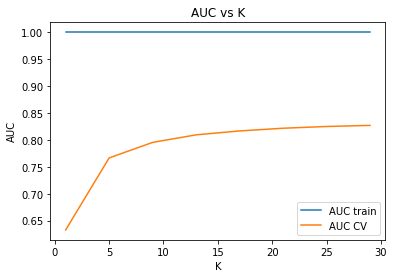

In [102]:
auc_cv=[]
auc_train=[]
K=list(range(1,30,4))
cv_scores=[]
for i in K:
    knn=KNeighborsClassifier(n_neighbors=i,weights='distance',algorithm='brute',leaf_size=30, p=2, metric='cosine')
    knn.fit(X_train, y_train)
    pred = knn.predict_proba(X_cv)[:,1]
    auc_cv.append(roc_auc_score(y_cv,pred))
    pred1=knn.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1))      
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(K, auc_train, label='AUC train')
ax.plot(K, auc_cv, label='AUC CV')
plt.title('AUC vs K')
plt.xlabel('K')
plt.ylabel('AUC')
ax.legend()
plt.show()

In [ ]:
# Taking k = 28 as the best hyperparameter looking at the graph.

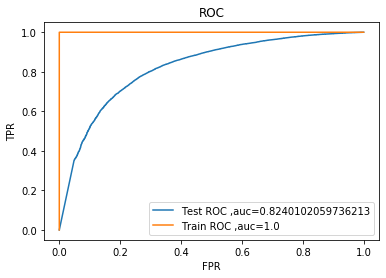

In [106]:
knn=KNeighborsClassifier(n_neighbors= 28,weights='distance',algorithm='brute',leaf_size=30, p=2, metric='cosine')
knn.fit(X_train,y_train)
predi=knn.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=knn.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

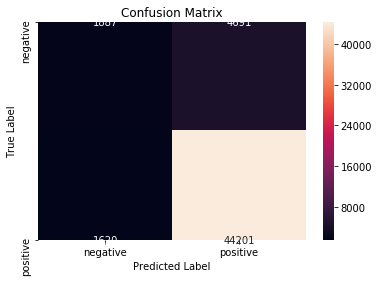

In [107]:
knn.fit(X_train,y_train)
predic=knn.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [110]:

print(conf_mat)

[[ 1887  4691]
 [ 1620 44201]]


In [113]:
knn.classes_

array([0, 1], dtype=int64)

In [114]:
knn.effective_metric_

'cosine'

## Naive Bayes

In [119]:
from sklearn.naive_bayes import BernoulliNB

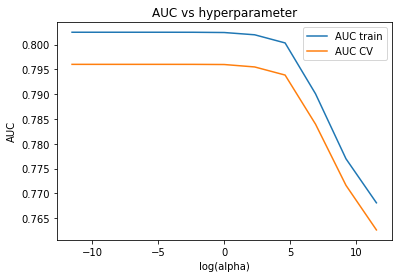

optimal alpha for which auc is maximum :  0.0001


In [121]:
auc_train=[]
auc_cv=[]

alpha_values = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000,100000]#alpha from 10^-5 to 10^5
    
for i in alpha_values:
    mnb =  BernoulliNB(alpha = i)
    mnb.fit(X_train,y_train)
    pred=mnb.predict_proba(X_cv)[:,1]
    pred1=mnb.predict_proba(X_train)[:,1]
    auc_train.append(roc_auc_score(y_train,pred1))
    auc_cv.append(roc_auc_score(y_cv,pred))
    
optimal_alpha= alpha_values[auc_cv.index(max(auc_cv))]
alpha_values=[math.log(x) for x in alpha_values]
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(alpha_values, auc_train, label='AUC train')
ax.plot(alpha_values, auc_cv, label='AUC CV')
plt.title('AUC vs hyperparameter')
plt.xlabel('log(alpha)')
plt.ylabel('AUC')
ax.legend()
plt.show()
print('optimal alpha for which auc is maximum : ',optimal_alpha)

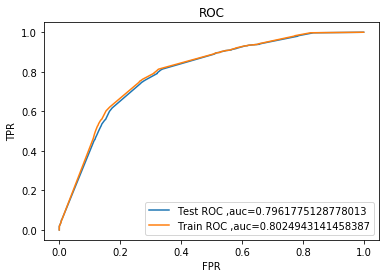

In [123]:
#ROC for alpha = 0.0001
mnb=BernoulliNB(alpha = 0.0001)
mnb.fit(X_train,y_train)
predi=mnb.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=mnb.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

[[ 6752  8006]
 [ 9720 93417]]


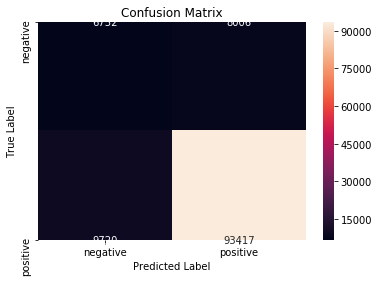

In [126]:
#confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix
mnb=BernoulliNB(alpha=0.0001)
mnb.fit(X_train,y_train)
predic=mnb.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_train, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

[[ 2996  3582]
 [ 4292 41529]]


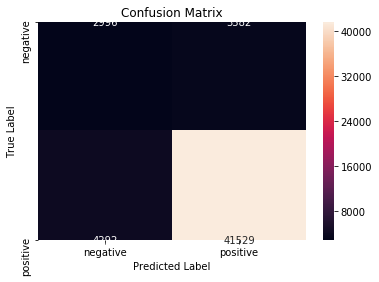

In [128]:
#Confusion matrix using heatmap for test data
mnb= BernoulliNB(alpha=1)
mnb.fit(X_train,y_train)
predic=mnb.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

In [129]:
mnb.class_count_

array([ 14758., 103137.])

In [131]:
mnb.classes_

array([0, 1], dtype=int64)

In [132]:
#Number of samples encountered for each (class, feature) during fitting. This value is weighted by the sample weight when provided.
mnb.feature_count_

array([[1.47580e+04, 1.44880e+04, 1.17850e+04, 1.17850e+04, 1.24470e+04,
        1.24410e+04, 9.60300e+03, 3.44000e+02, 9.52300e+03, 8.47000e+03,
        3.67300e+03, 8.47000e+03, 8.47000e+03, 7.95200e+03, 9.55000e+03,
        4.65200e+03, 9.55000e+03, 9.55000e+03, 8.96000e+03, 2.38000e+02,
        1.18000e+02, 2.63000e+02, 8.70000e+01, 1.47580e+04, 1.47580e+04,
        1.47580e+04, 5.33000e+02, 1.47580e+04, 1.47580e+04, 1.47580e+04,
        5.20000e+02, 2.05500e+03, 2.42800e+03],
       [1.03137e+05, 1.02560e+05, 1.02681e+05, 1.02731e+05, 9.79980e+04,
        9.81880e+04, 9.58160e+04, 3.43300e+03, 9.64910e+04, 9.36750e+04,
        6.99370e+04, 9.36750e+04, 9.36750e+04, 9.17000e+04, 9.64870e+04,
        7.61210e+04, 9.64870e+04, 9.64870e+04, 9.46970e+04, 2.03500e+03,
        7.45000e+02, 2.73100e+03, 3.76000e+02, 1.01295e+05, 1.01295e+05,
        1.01303e+05, 7.46100e+03, 1.01983e+05, 1.01978e+05, 1.01978e+05,
        6.34000e+03, 5.57510e+04, 6.15790e+04]])

In [133]:
#Empirical log probability of features given a class, P(x_i|y).
mnb.feature_log_prob_

array([[-6.77529727e-05, -1.85310783e-02, -2.25008433e-01,
        -2.25008433e-01, -1.70360852e-01, -1.70842973e-01,
        -4.29741141e-01, -3.75613168e+00, -4.38105891e-01,
        -5.55272254e-01, -1.39063983e+00, -5.55272254e-01,
        -5.55272254e-01, -6.18371603e-01, -4.35274958e-01,
        -1.15440865e+00, -4.35274958e-01, -4.35274958e-01,
        -4.99038991e-01, -4.12321255e+00, -4.82055261e+00,
        -4.02372700e+00, -5.12233928e+00, -6.77529727e-05,
        -6.77529727e-05, -6.77529727e-05, -3.31928026e+00,
        -6.77529727e-05, -6.77529727e-05, -6.77529727e-05,
        -3.34392606e+00, -1.97115847e+00, -1.80444117e+00],
       [-9.69570044e-06, -5.61984950e-03, -4.44075921e-03,
        -3.95393747e-03, -5.11203185e-02, -4.91834002e-02,
        -7.36374708e-02, -3.40235183e+00, -6.66174897e-02,
        -9.62355732e-02, -3.88468458e-01, -9.62355732e-02,
        -9.62355732e-02, -1.17544309e-01, -6.66589447e-02,
        -3.03740277e-01, -6.66589447e-02, -6.66589447e-

In [136]:
feature_names = list(data.columns.values)

In [137]:
feature_names

['Unnamed: 0',
 'aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [139]:
# Top 10 features for deciding a +ve class.
model= BernoulliNB(alpha=0.0001)
model.fit(X_train,y_train)
features = model.feature_log_prob_ #log probability of features given a class

negative_features = np.argsort(features[0])[::-1] #Returns the indices that would sort an array
positive_features = np.argsort(features[1])[::-1]
print("Top 10 important features of positive class from BOW")
for i in list(positive_features[0:10]):
    print(feature_names[i])

Top 10 important features of positive class from BOW
Unnamed: 0
daily_decr90
daily_decr30
aon
cnt_loans90
maxamnt_loans90
amnt_loans90
maxamnt_loans30
amnt_loans30
cnt_loans30


In [140]:
print("Top 10 important features of negative class")
for i in list(negative_features[0:10]):
    print(feature_names[i])

Top 10 important features of negative class from BOW
Unnamed: 0
maxamnt_loans90
amnt_loans90
cnt_loans90
maxamnt_loans30
amnt_loans30
cnt_loans30
aon
rental30
rental90


## Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

In [142]:
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
rf = RandomForestClassifier(max_features='sqrt')
model=GridSearchCV(rf,param_grid,scoring='roc_auc',n_jobs=-1,cv=3)
model.fit(X_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)

optimal n_estimators 120
optimal max_depth 100


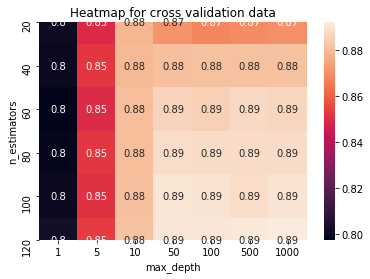

In [143]:
import seaborn as sns
X=[]
Y=[]
Z=[]
Zt=[]
for bl in base_learners:
    for d in depths:
        rf=RandomForestClassifier(max_features='sqrt',max_depth=d,n_estimators=bl)
        rf.fit(X_train,y_train)
        pred=rf.predict_proba(X_cv)[:,1]
        predt=rf.predict_proba(X_train)[:,1]
        X.append(bl)
        Y.append(d)
        Z.append(roc_auc_score(y_cv,pred))
        Zt.append(roc_auc_score(y_train,predt))
        
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': Z})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for cross validation data')
plt.show()

In [180]:
data

,n_estimators,max_depth,AUC
0,20,1,0.807314
1,20,5,0.857225
2,20,10,0.909245
3,20,50,0.999965
4,20,100,0.999971
5,20,500,0.999969
6,20,1000,0.999961
7,40,1,0.806069
8,40,5,0.859147
9,40,10,0.911264


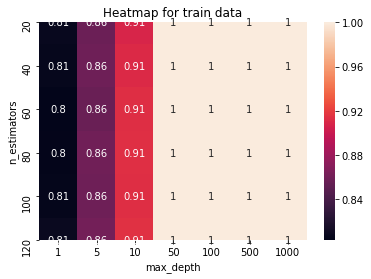

In [144]:
data = pd.DataFrame({'n_estimators': X, 'max_depth': Y, 'AUC': Zt})
data_pivoted = data.pivot("n_estimators", "max_depth", "AUC")
ax = sns.heatmap(data_pivoted,annot=True)
plt.title('Heatmap for train data')
plt.show()

In [181]:
data_pivoted

max_depth,1,5,10,50,100,500,1000
n_estimators,,,,,,,
20,0.807314,0.857225,0.909245,0.999965,0.999971,0.999969,0.999961
40,0.806069,0.859147,0.911264,0.999998,0.999998,0.999999,0.999998
60,0.803162,0.856719,0.913127,1.000000,1.000000,1.000000,1.000000
80,0.804299,0.859526,0.914041,1.000000,1.000000,1.000000,1.000000
100,0.805431,0.859046,0.913716,1.000000,1.000000,1.000000,1.000000
120,0.808088,0.860933,0.914678,1.000000,1.000000,1.000000,1.000000


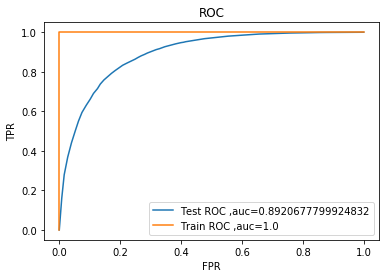

In [145]:
rf=RandomForestClassifier(max_features='sqrt',max_depth=500,n_estimators=120)
rf.fit(X_train,y_train)
predi=rf.predict_proba(X_test)[:,1]
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, predi)
pred=rf.predict_proba(X_train)[:,1]
fpr2,tpr2,thresholds2=metrics.roc_curve(y_train,pred)
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(fpr1, tpr1, label='Test ROC ,auc='+str(roc_auc_score(y_test,predi)))
ax.plot(fpr2, tpr2, label='Train ROC ,auc='+str(roc_auc_score(y_train,pred)))
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
ax.legend()
plt.show()

[[ 14758      0]
 [     0 103137]]


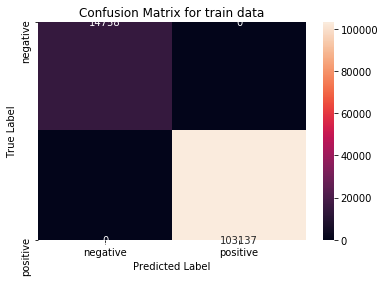

In [148]:
#Confusion matrix using heatmap for train data
from sklearn.metrics import confusion_matrix

predic=rf.predict(X_train)
import seaborn as sns
conf_mat = confusion_matrix(y_train, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for train data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

[[ 2846  3732]
 [  845 44976]]


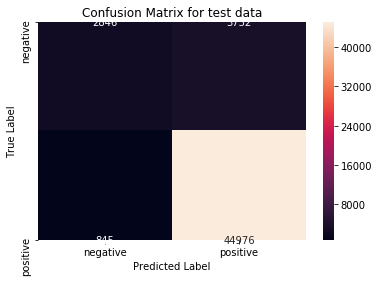

In [149]:
#Confusion matrix using heatmap for test data
from sklearn.metrics import confusion_matrix

predic=rf.predict(X_test)
import seaborn as sns
conf_mat = confusion_matrix(y_test, predic)
class_label = ["negative", "positive"]
df = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(df, annot = True,fmt="d")
plt.title("Confusion Matrix for test data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
print(conf_mat)
plt.show()

In [150]:
feat=rf.feature_importances_
feat

array([0.0606638 , 0.06580193, 0.12983655, 0.15213772, 0.0629585 ,
       0.06457069, 0.04172069, 0.00315803, 0.01861799, 0.02064034,
       0.01702167, 0.03262421, 0.02083043, 0.04148913, 0.03454495,
       0.01961886, 0.05261795, 0.02248974, 0.04649972, 0.00200029,
       0.00134635, 0.00198575, 0.00092703, 0.00651932, 0.01184151,
       0.00402103, 0.00408144, 0.00994807, 0.01463733, 0.00278694,
       0.00422415, 0.01158185, 0.01625604])

In [153]:
features_imp=np.argsort(feat)[::-1]

In [154]:
features_imp

array([ 3,  2,  1,  5,  4,  0, 16, 18,  6, 13, 14, 11, 17, 12,  9, 15,  8,
       10, 32, 28, 24, 31, 27, 23, 30, 26, 25,  7, 29, 19, 21, 20, 22],
      dtype=int64)

In [157]:
#feature importances in order
for i in features_imp[0:20]:
    print(feature_names[i])

daily_decr90
daily_decr30
aon
rental90
rental30
Unnamed: 0
sumamnt_ma_rech90
medianmarechprebal90
last_rech_date_ma
medianmarechprebal30
cnt_ma_rech90
sumamnt_ma_rech30
medianamnt_ma_rech90
medianamnt_ma_rech30
cnt_ma_rech30
fr_ma_rech90
last_rech_amt_ma
fr_ma_rech30
payback90
amnt_loans90


# CONCLUSIONS

In [53]:
from prettytable import PrettyTable    
x = PrettyTable()
x.field_names = ["Model","Test-Score(AUC)","Train-Score(AUC)"]
x.add_row(['Logistic Regression','0.830','0.839'])
x.add_row(['Support Vector Machine','0.812','0.821'])
x.add_row(['Decision Tree','0.868','0.887'])
x.add_row(['KNN','0.820','1.0'])
x.add_row(['Naive-Bayes','0.796','0.802'])
x.add_row(['Random Forest','0.892','1.0'])

print(x)

+------------------------+-----------------+------------------+
|         Model          | Test-Score(AUC) | Train-Score(AUC) |
+------------------------+-----------------+------------------+
|  Logistic Regression   |      0.830      |      0.839       |
| Support Vector Machine |      0.812      |      0.821       |
|     Decision Tree      |      0.868      |      0.887       |
|          KNN           |      0.820      |       1.0        |
|      Naive-Bayes       |      0.796      |      0.802       |
|     Random Forest      |      0.892      |       1.0        |
+------------------------+-----------------+------------------+


#1.Random Forest seems to have the Best Test-Score,but it seems to be overfitting the data by seeing the Train score.
#2.KNN is also overfitting to the data.
#3.Decision Tree seems to be not overfitting and not underfitting the data.

In [108]:
#Over sampling method SMOTE (Synthetic Minority Over-sampling Technique ) was also applied on the training data to make
#the data more balanced. The resulting data is used for learning the logistic regression model and test-score (AUC) came out
#to be 0.8299 which is almost equal to the test-score of 0.8303 without using SMOTE.

#Given that there is no improvement in AUC score after using SMOTE, I refrained from using SMOTE for all the models.